In [1]:
# Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

# Step 2: Load Dataset
data = pd.read_csv("fetal_health.csv")

# Step 3: Quick Preview
print("Dataset Shape:", data.shape)
display(data.head())
display(data.info())
display(data.describe())


Dataset Shape: (2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

None

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


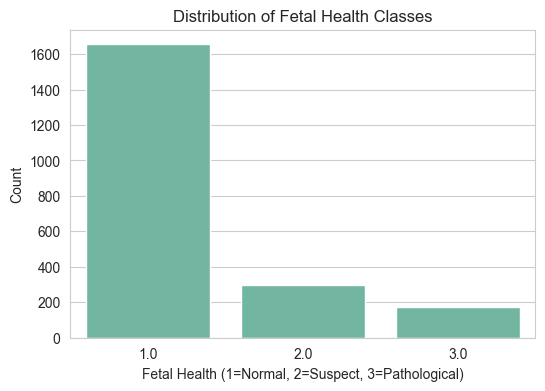

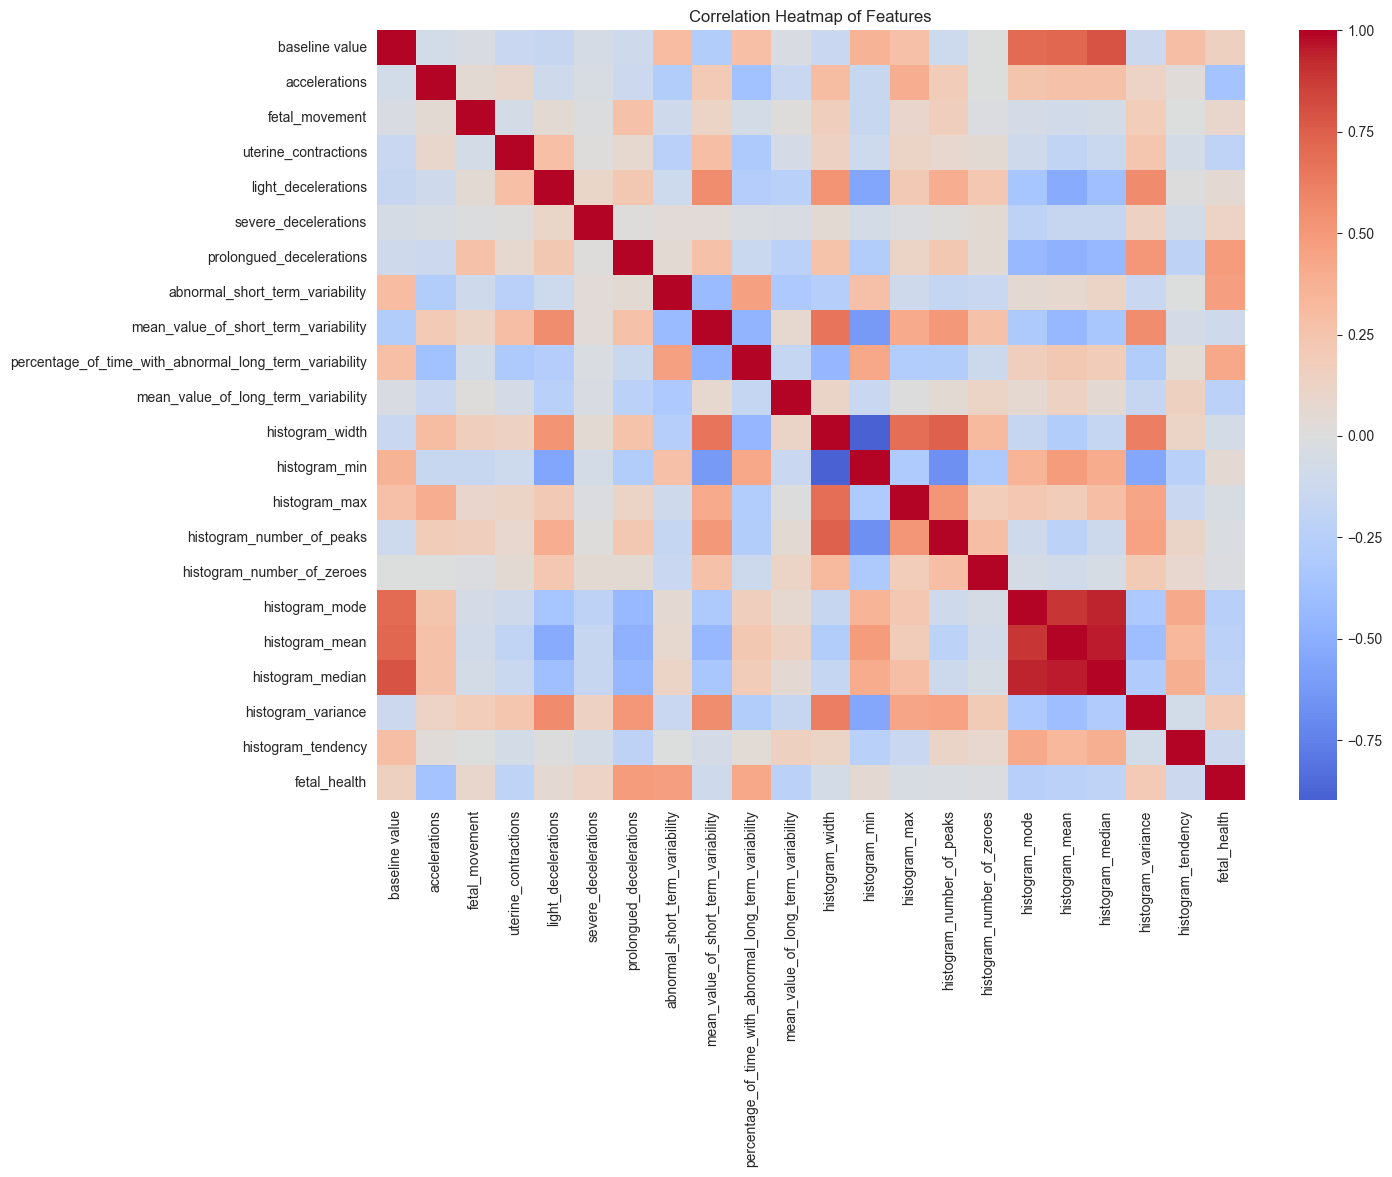

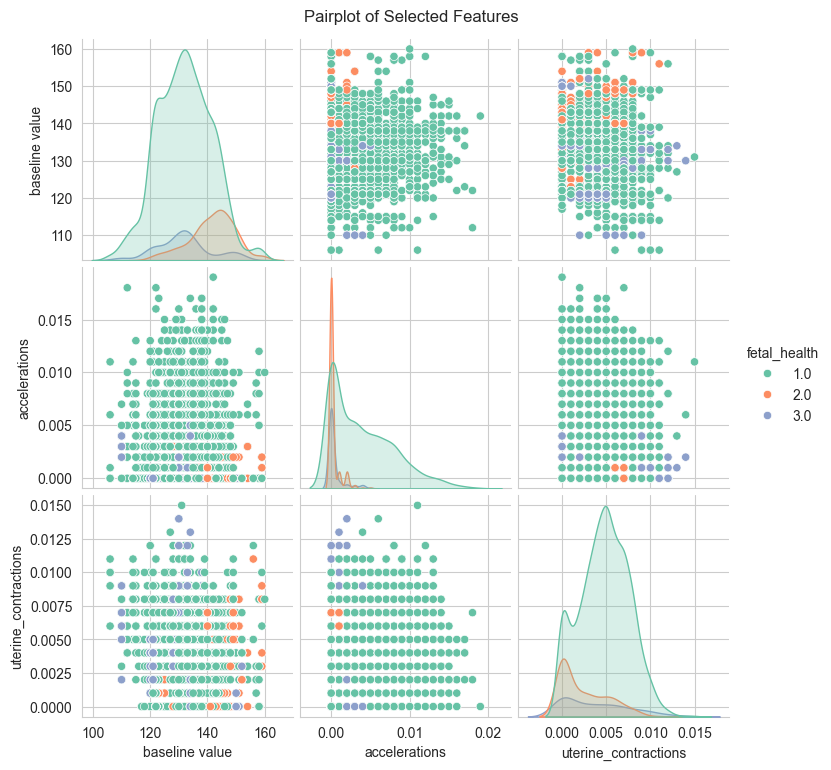

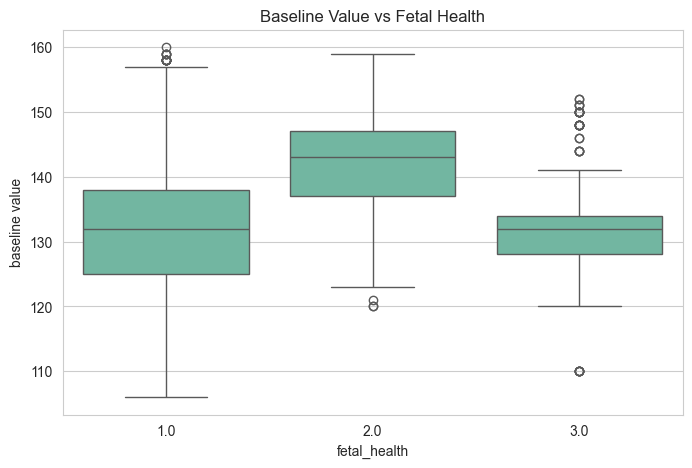

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Exploratory Data Analysis (EDA)

# Check target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='fetal_health', data=data, color=sns.color_palette("Set2")[0])
plt.title("Distribution of Fetal Health Classes")
plt.xlabel("Fetal Health (1=Normal, 2=Suspect, 3=Pathological)")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14,10))
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

# Pairplot (optional - only on few columns for clarity)
sample_cols = ['baseline value','accelerations','uterine_contractions','fetal_health']
sns.pairplot(data[sample_cols], hue='fetal_health', palette='Set2')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Boxplot example for outliers
plt.figure(figsize=(8,5))
sns.boxplot(x='fetal_health', y='baseline value', data=data, color=sns.color_palette("Set2")[0])
plt.title("Baseline Value vs Fetal Health")
plt.show()


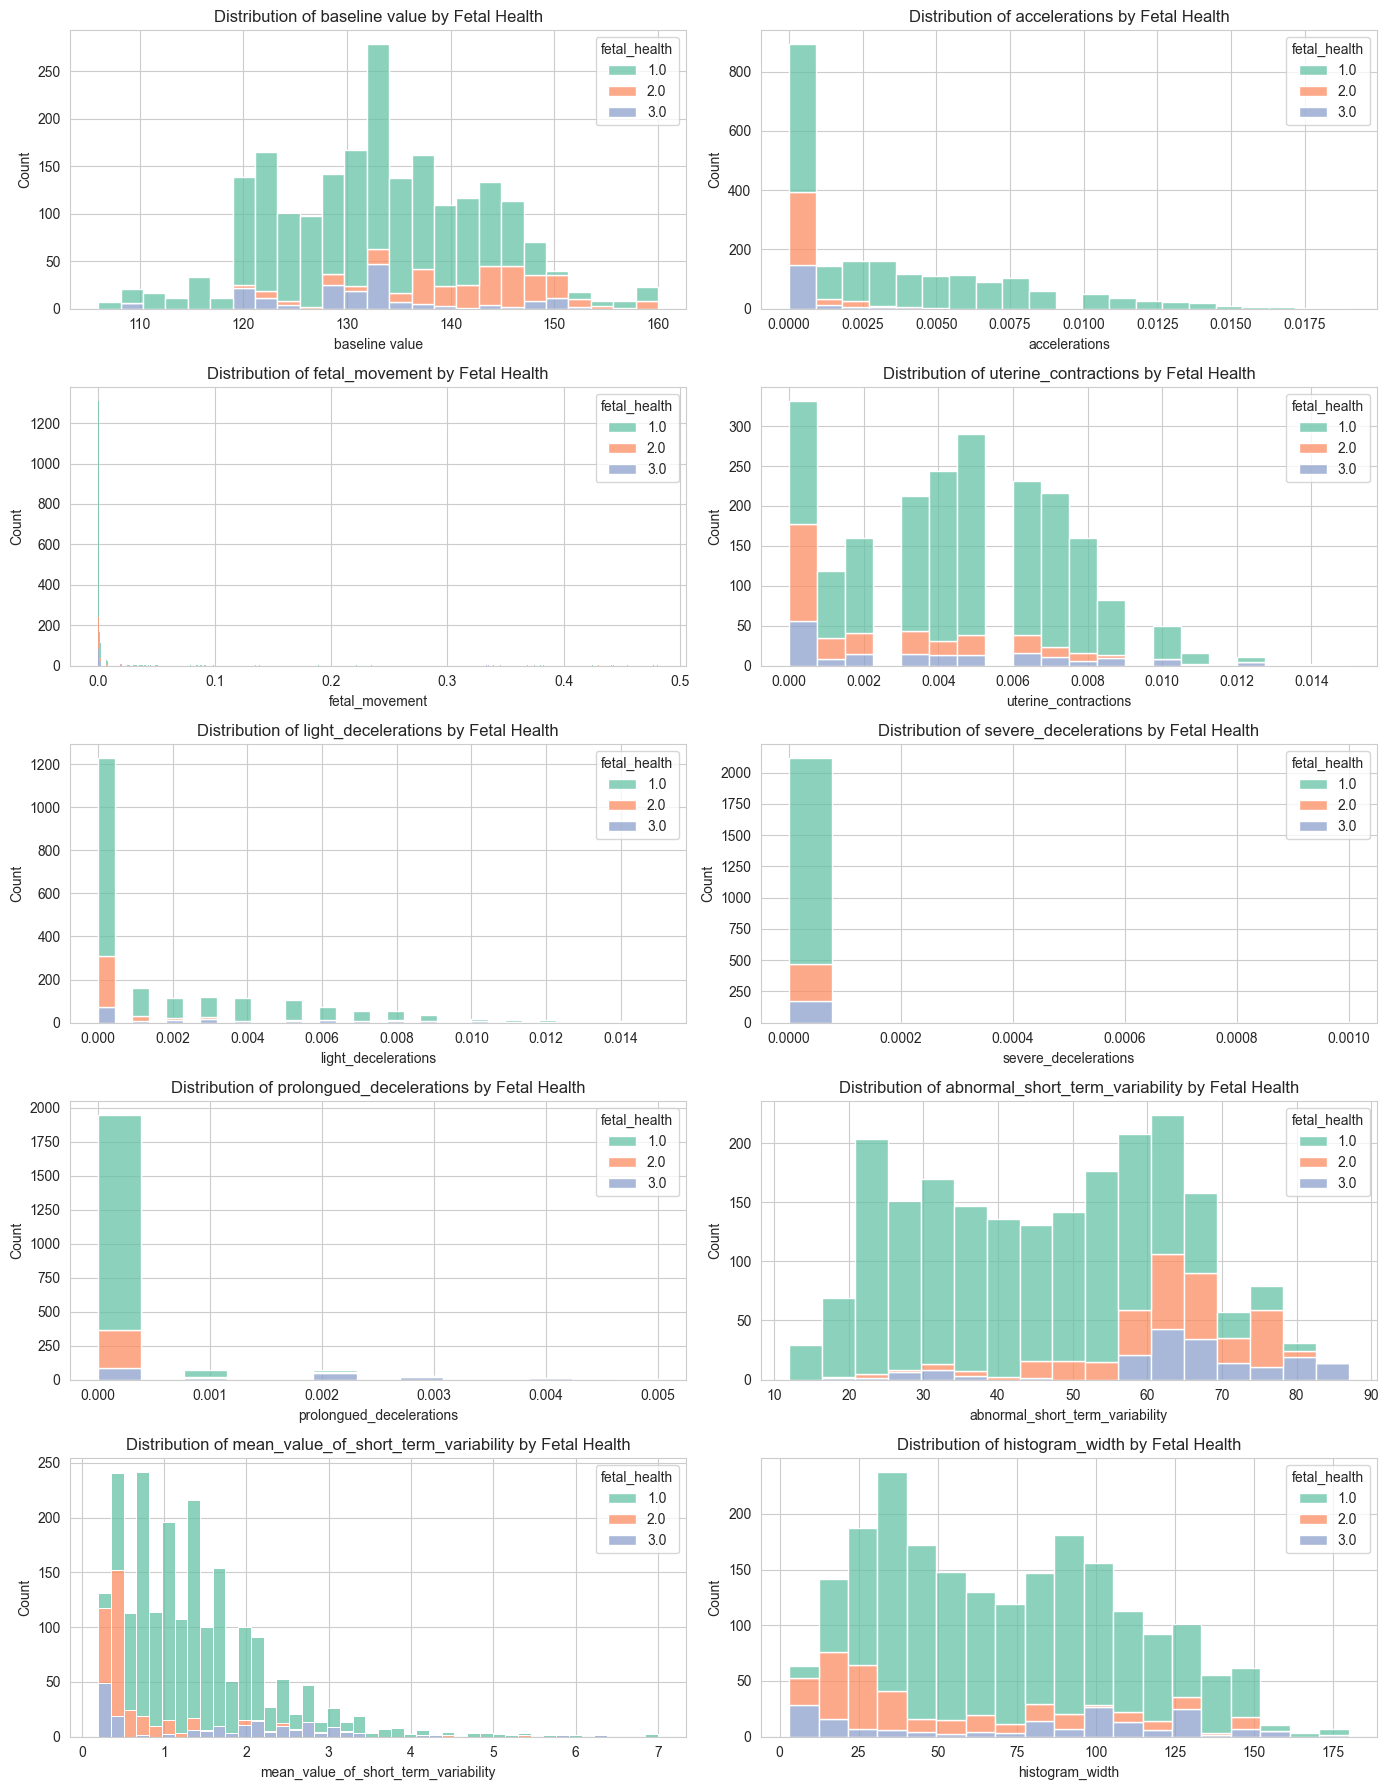

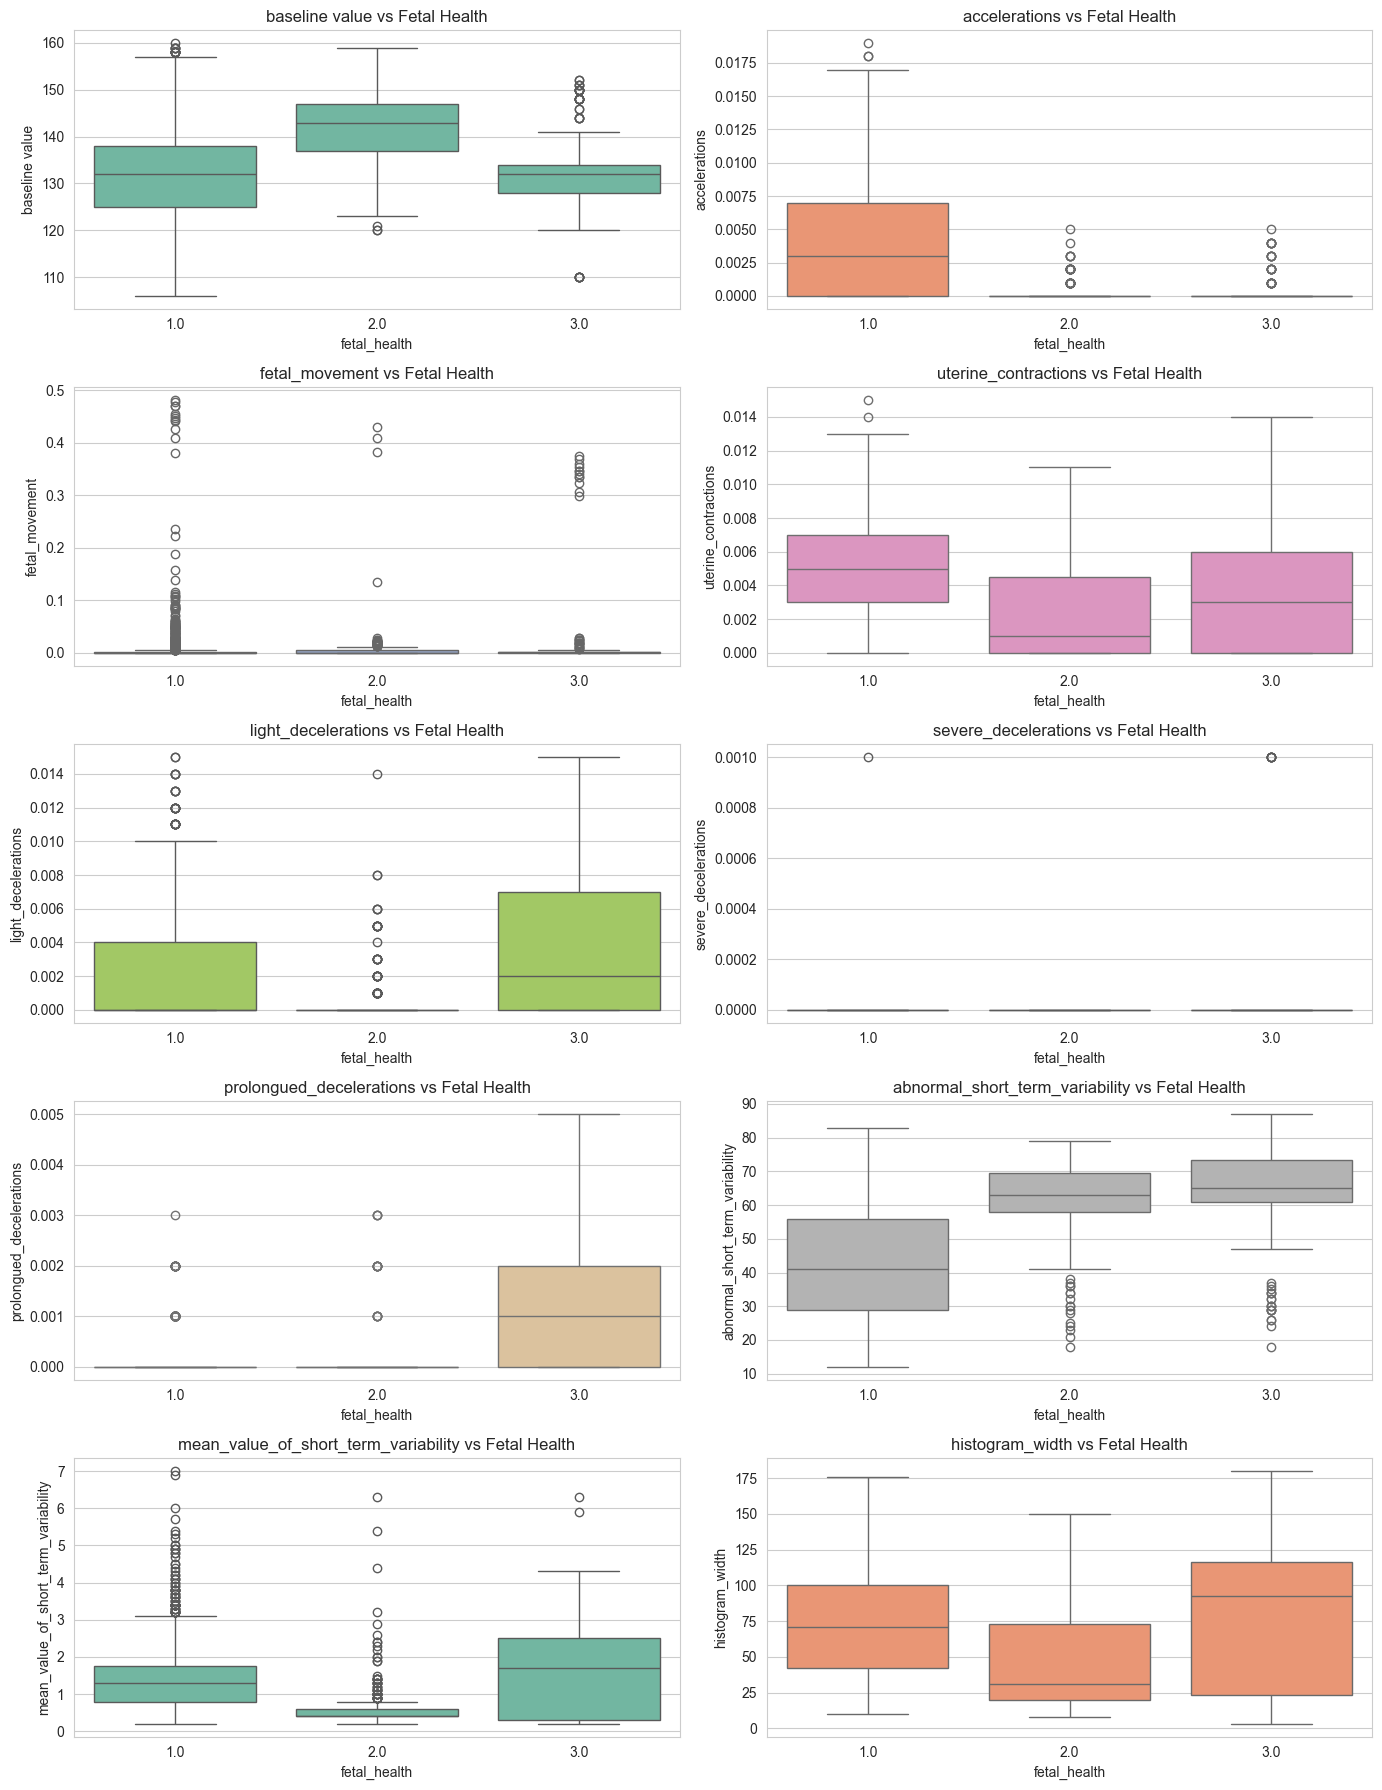

In [3]:
# Step 3: Feature Distributions by Fetal Health

important_features = [
    'baseline value',
    'accelerations',
    'fetal_movement',
    'uterine_contractions',
    'light_decelerations',
    'severe_decelerations',
    'prolongued_decelerations',
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    'histogram_width'
]

# Plot histograms for distributions (palette is fine because hue is used)
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(important_features):
    sns.histplot(
        data=data, 
        x=col, 
        hue='fetal_health', 
        multiple='stack', 
        palette='Set2', 
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col} by Fetal Health")

plt.tight_layout()
plt.show()

# Boxplots to compare distributions across classes (replace palette with color)
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(important_features):
    sns.boxplot(
        data=data, 
        x='fetal_health', 
        y=col, 
        color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))],  # cycle colors
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Fetal Health")

plt.tight_layout()
plt.show()


Missing values in each column:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram

/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/660559322.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_vals.index, y=missing_vals.values, palette="Set2")


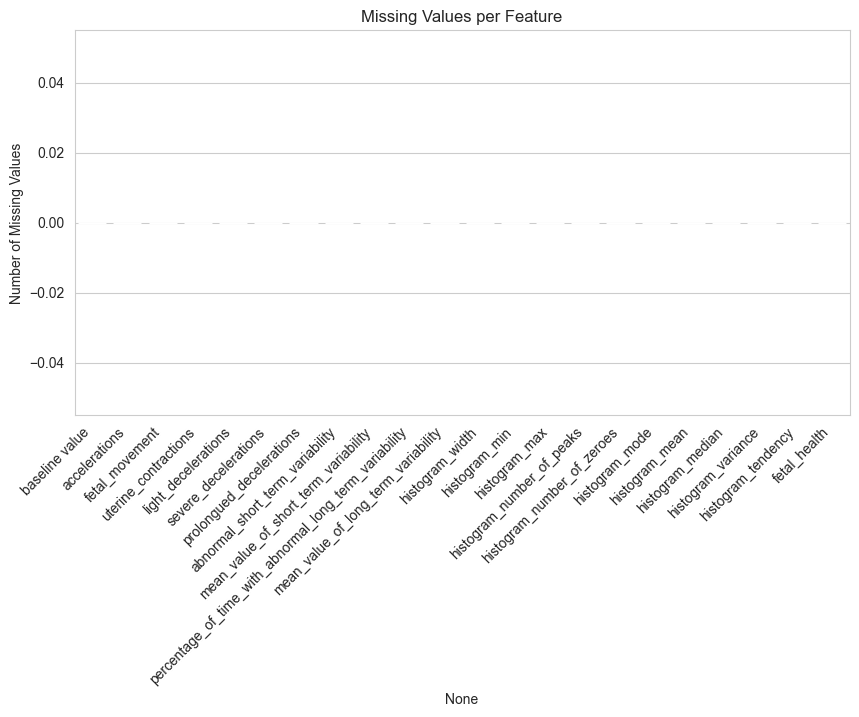

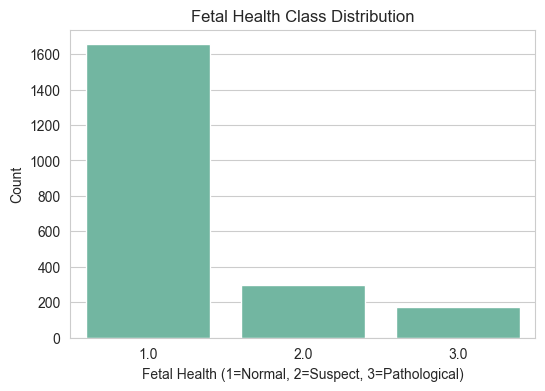

Class counts:
 fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


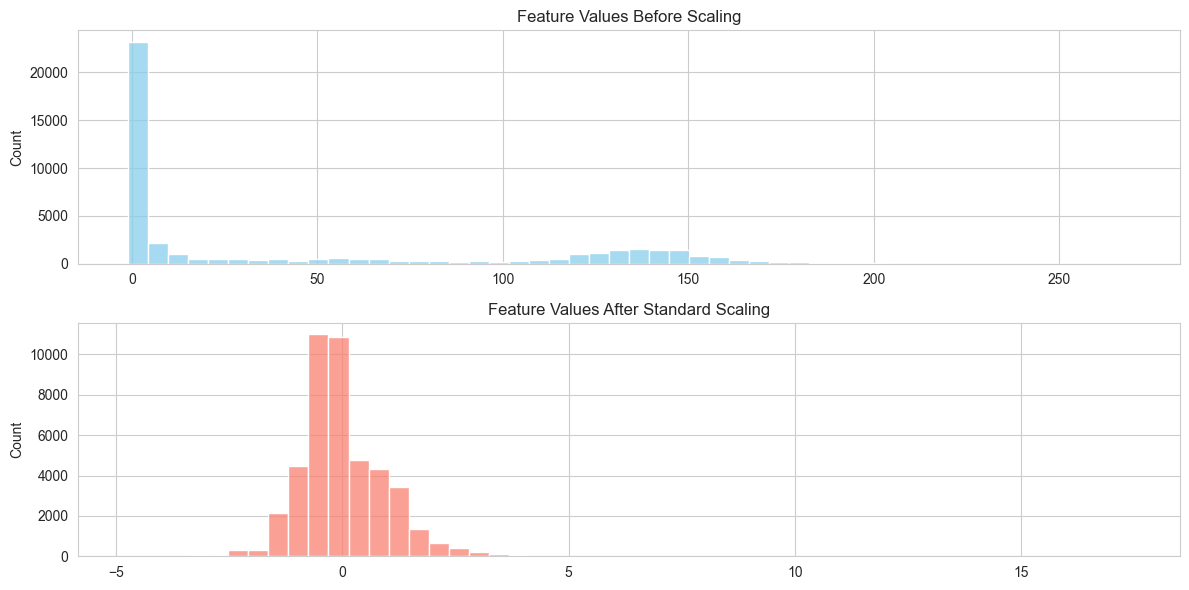

Train shape: (1700, 21), Test shape: (426, 21)
Train class distribution:
 fetal_health
1.0    1323
2.0     236
3.0     141
Name: count, dtype: int64
Test class distribution:
 fetal_health
1.0    332
2.0     59
3.0     35
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ================================
# Step 4: Data Preprocessing & Visual Analysis
# ================================

# 1️⃣ Check for missing values
missing_vals = data.isnull().sum()
print("Missing values in each column:")
print(missing_vals)

# Visualize missing values
plt.figure(figsize=(10,5))
sns.barplot(x=missing_vals.index, y=missing_vals.values, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Feature")
plt.show()

# 2️⃣ Visualize target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='fetal_health', data=data, color=sns.color_palette("Set2")[0])
plt.title("Fetal Health Class Distribution")
plt.xlabel("Fetal Health (1=Normal, 2=Suspect, 3=Pathological)")
plt.ylabel("Count")
plt.show()

print("Class counts:\n", data['fetal_health'].value_counts())

# 3️⃣ Separate features and target
X = data.drop(columns=['fetal_health'])
y = data['fetal_health']

# 4️⃣ Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Visualize feature distribution before vs after scaling
fig, axes = plt.subplots(2, 1, figsize=(12,6))
sns.histplot(X.values.flatten(), bins=50, color='skyblue', ax=axes[0])
axes[0].set_title("Feature Values Before Scaling")
sns.histplot(X_scaled.flatten(), bins=50, color='salmon', ax=axes[1])
axes[1].set_title("Feature Values After Standard Scaling")
plt.tight_layout()
plt.show()

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("Train class distribution:\n", pd.Series(y_train).value_counts())
print("Test class distribution:\n", pd.Series(y_test).value_counts())



===== Logistic Regression =====
Accuracy: 0.8850
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       0.61      0.68      0.64        59
         3.0       0.88      0.66      0.75        35

    accuracy                           0.88       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.89      0.88      0.89       426



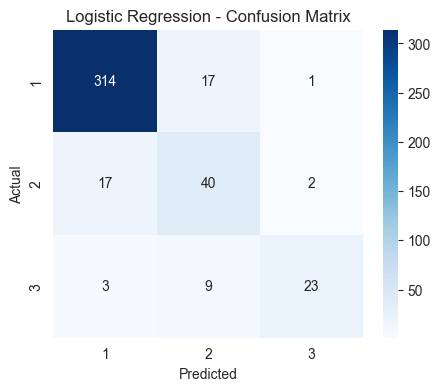


===== Decision Tree =====
Accuracy: 0.8991
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       0.72      0.64      0.68        59
         3.0       0.81      0.83      0.82        35

    accuracy                           0.90       426
   macro avg       0.82      0.81      0.81       426
weighted avg       0.90      0.90      0.90       426



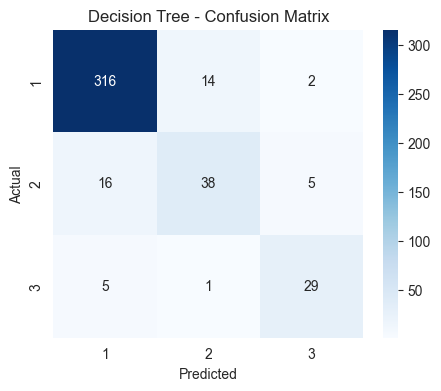


===== Random Forest =====
Accuracy: 0.9272
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       332
         2.0       0.85      0.68      0.75        59
         3.0       0.86      0.86      0.86        35

    accuracy                           0.93       426
   macro avg       0.88      0.84      0.86       426
weighted avg       0.92      0.93      0.92       426



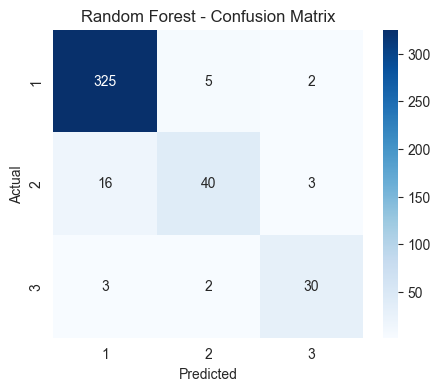


===== Gradient Boosting =====
Accuracy: 0.9272
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       332
         2.0       0.85      0.68      0.75        59
         3.0       0.84      0.91      0.88        35

    accuracy                           0.93       426
   macro avg       0.88      0.86      0.86       426
weighted avg       0.93      0.93      0.92       426



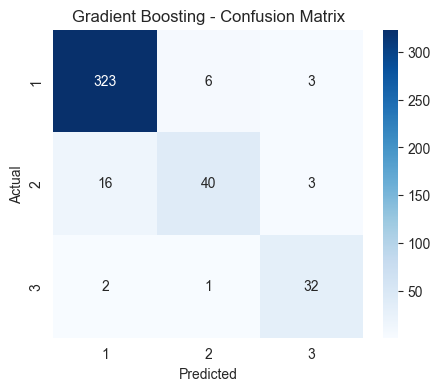


===== Support Vector Machine =====
Accuracy: 0.8944
Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       332
         2.0       0.67      0.58      0.62        59
         3.0       0.86      0.71      0.78        35

    accuracy                           0.89       426
   macro avg       0.82      0.75      0.78       426
weighted avg       0.89      0.89      0.89       426



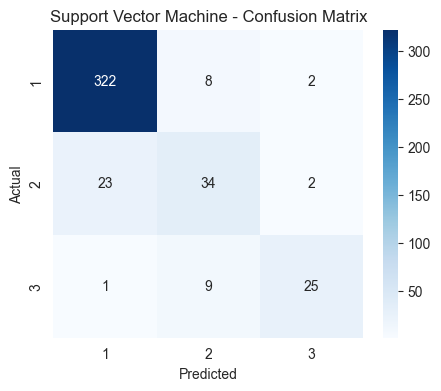


===== K-Nearest Neighbors =====
Accuracy: 0.8732
Classification Report:
              precision    recall  f1-score   support

         1.0       0.90      0.97      0.93       332
         2.0       0.62      0.47      0.54        59
         3.0       0.88      0.66      0.75        35

    accuracy                           0.87       426
   macro avg       0.80      0.70      0.74       426
weighted avg       0.86      0.87      0.86       426



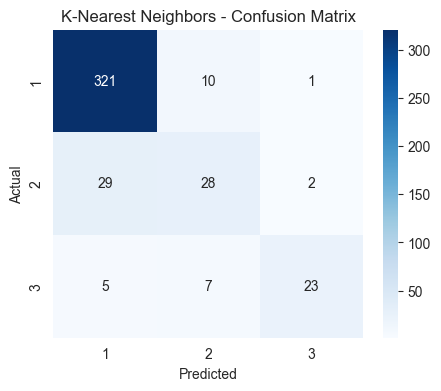


===== Naive Bayes =====
Accuracy: 0.8099
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.85      0.91       332
         2.0       0.45      0.80      0.57        59
         3.0       0.53      0.46      0.49        35

    accuracy                           0.81       426
   macro avg       0.65      0.70      0.66       426
weighted avg       0.86      0.81      0.83       426



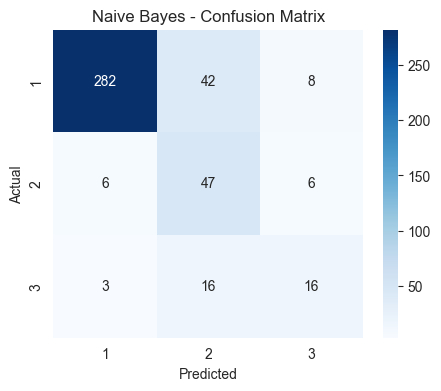

/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/275465476.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Set2")


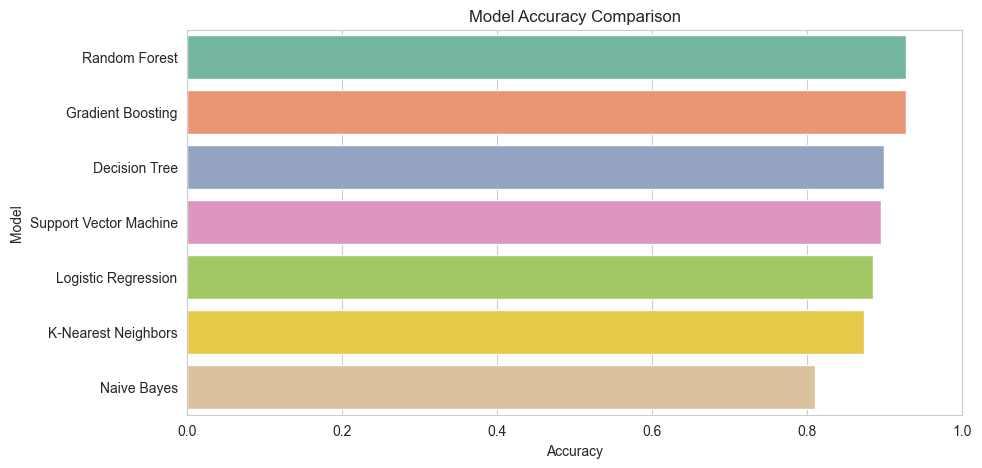

Model Accuracy Comparison:
                    Model  Accuracy
2           Random Forest  0.927230
3       Gradient Boosting  0.927230
1           Decision Tree  0.899061
4  Support Vector Machine  0.894366
0     Logistic Regression  0.884977
5     K-Nearest Neighbors  0.873239
6             Naive Bayes  0.809859


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# Step 5: Model Building & Evaluation
# ================================

# 1️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# 2️⃣ Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    
    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 3️⃣ Compare model accuracies
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()

print("Model Accuracy Comparison:")
print(results_df)



Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation accuracy: 0.9441

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation accuracy: 0.9547

Tuning Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9271

===== Random Forest (Tuned) =====
Test Accuracy: 0.9249


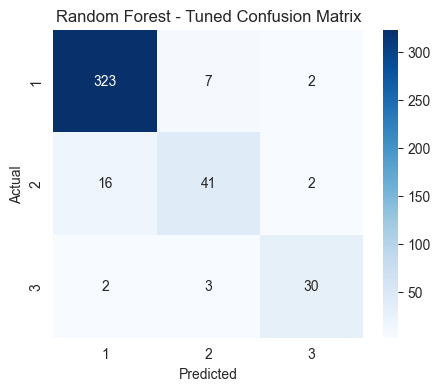


===== Gradient Boosting (Tuned) =====
Test Accuracy: 0.9319


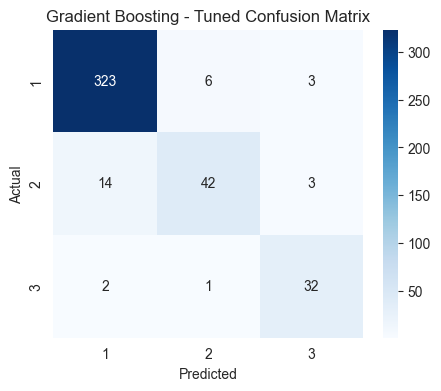


===== Support Vector Machine (Tuned) =====
Test Accuracy: 0.9108


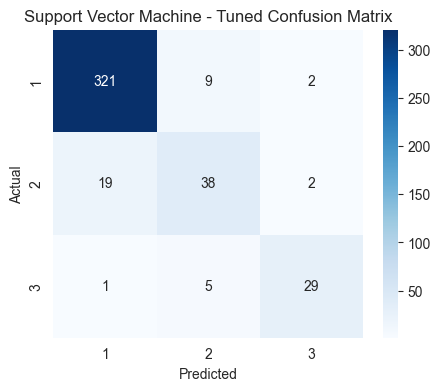

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# ================================
# Step 6: Hyperparameter Tuning
# ================================

# 1️⃣ Choose top models for tuning (based on Step 5)
tune_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# 2️⃣ Define hyperparameter grids
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}

# 3️⃣ Perform GridSearchCV
best_models = {}

for name, model in tune_models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

# 4️⃣ Evaluate best models on test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n===== {name} (Tuned) =====")
    print(f"Test Accuracy: {acc:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
    plt.title(f"{name} - Tuned Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [7]:
!pip install numpy==2.2


/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/4207807849.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='Set2')


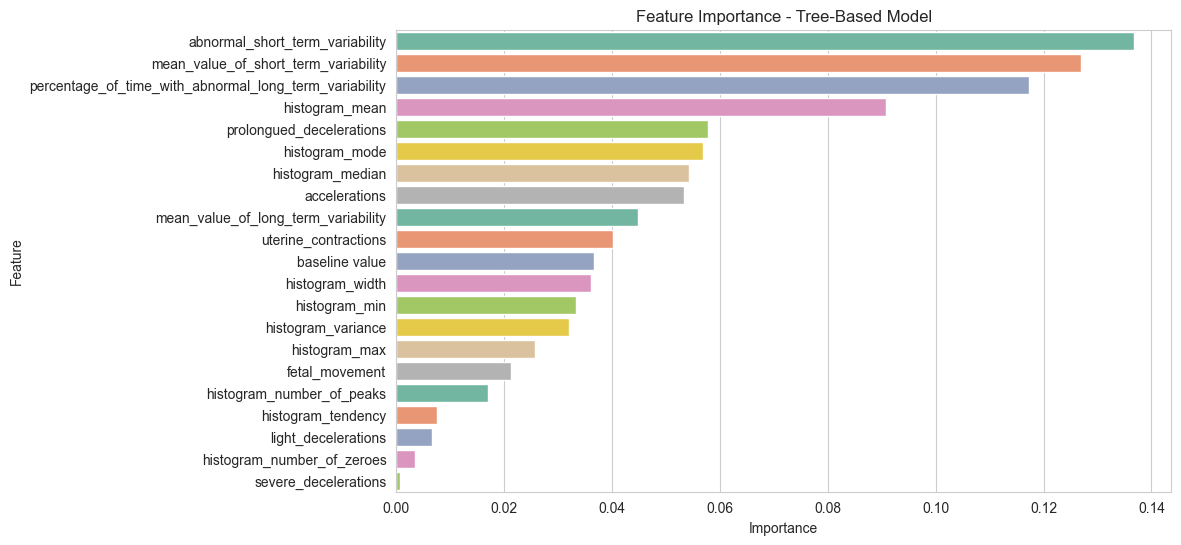

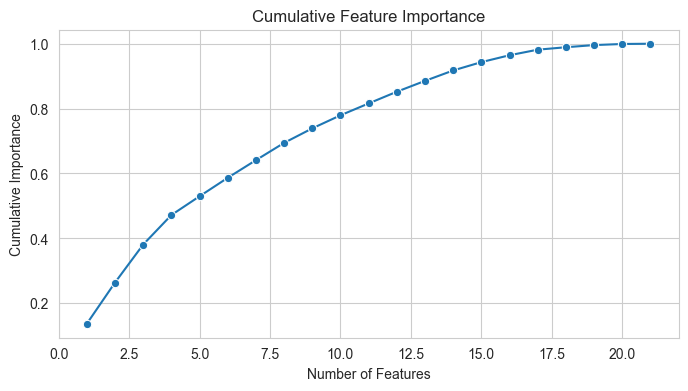

/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/4207807849.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=f, data=data, palette='Set2')


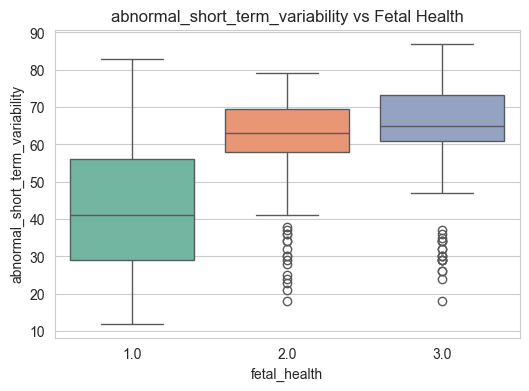

/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/4207807849.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=f, data=data, palette='Set2')


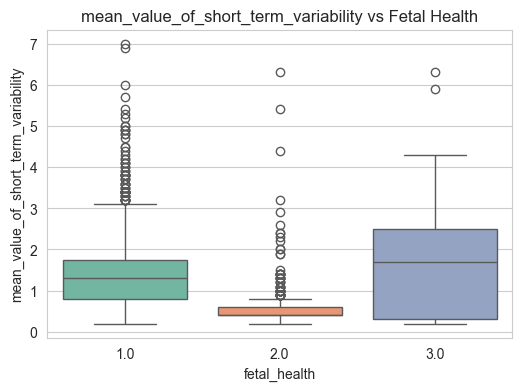

/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/4207807849.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=f, data=data, palette='Set2')


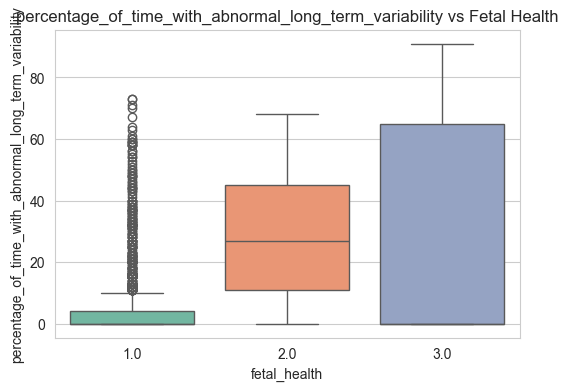

/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/4207807849.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=f, data=data, palette='Set2')


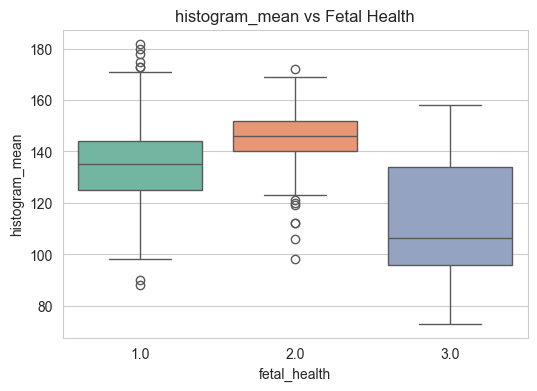

/var/folders/rg/rj61_kn94_58vl3311n3bdwm0000gn/T/ipykernel_27856/4207807849.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y=f, data=data, palette='Set2')


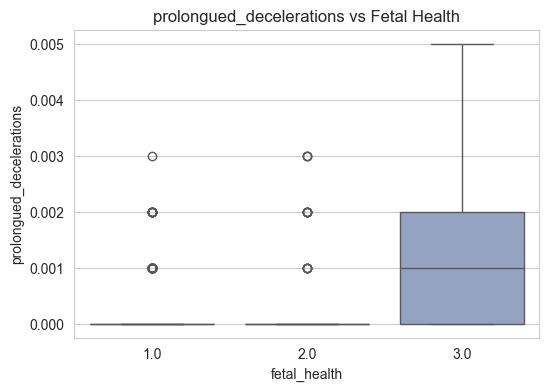

In [8]:
# ================================
# Step 7: Model Interpretation WITHOUT SHAP
# ================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Use the best tree-based model (Random Forest or Gradient Boosting)
best_tree_model = best_models['Random Forest']  # or 'Gradient Boosting'

# Feature names
feature_names = data.drop(columns=['fetal_health']).columns

# 1️⃣ Global feature importance from model
importances = best_tree_model.feature_importances_

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 2️⃣ Bar plot for feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='Set2')
plt.title("Feature Importance - Tree-Based Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 3️⃣ Optional: Cumulative importance
fi_df['Cumulative'] = np.cumsum(fi_df['Importance'])
plt.figure(figsize=(8,4))
sns.lineplot(x=range(1, len(fi_df)+1), y=fi_df['Cumulative'], marker='o')
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()

# 4️⃣ Optional: Boxplots for top features
top_features = fi_df['Feature'].head(5).values
for f in top_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='fetal_health', y=f, data=data, palette='Set2')
    plt.title(f"{f} vs Fetal Health")
    plt.show()


=== Weighted Voting Ensemble Performance ===
Accuracy: 0.9272
Precision: 0.9245
Recall: 0.9272
F1 Score: 0.9242

Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       332
         2.0       0.85      0.68      0.75        59
         3.0       0.88      0.86      0.87        35

    accuracy                           0.93       426
   macro avg       0.89      0.84      0.86       426
weighted avg       0.92      0.93      0.92       426


Confusion Matrix:
 [[325   5   2]
 [ 17  40   2]
 [  3   2  30]]


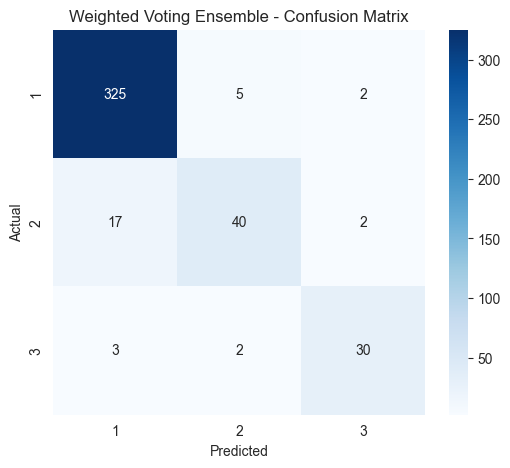

In [9]:
# ================================
# Step 8: Weighted Voting Ensemble
# ================================

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Use the previously defined models
rf = models["Random Forest"]
gb = models["Gradient Boosting"]
dt = models["Decision Tree"]
svc = models["Support Vector Machine"]
lr = models["Logistic Regression"]
knn = models["K-Nearest Neighbors"]
nb = models["Naive Bayes"]

# 2️⃣ Define weights based on accuracy
weights = [3, 3, 2, 2, 1, 1, 1]  # RF, GB, DT, SVM, LR, KNN, NB

# 3️⃣ Create Voting Classifier (hard voting = majority vote)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('dt', dt),
        ('svc', svc),
        ('lr', lr),
        ('knn', knn),
        ('nb', nb)
    ],
    voting='hard',
    weights=weights
)

# 4️⃣ Fit on training data
voting_clf.fit(X_train, y_train)

# 5️⃣ Predict on test data
y_pred = voting_clf.predict(X_test)

# 6️⃣ Evaluate ensemble
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("=== Weighted Voting Ensemble Performance ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", cm)

# 7️⃣ Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Weighted Voting Ensemble - Confusion Matrix")
plt.show()


In [10]:
# ================================
# Step 9 (Notebook Version): Manual Input for Prediction
# ================================

import numpy as np
import pandas as pd

# 1️⃣ Feature names
feature_names = data.drop(columns=['fetal_health']).columns

# 2️⃣ Function to input values and predict
def predict_fetal_health(model, feature_names):
    """
    Takes user input for all features and predicts fetal health class
    """
    input_values = []
    print("Enter values for the following features:\n")
    for f in feature_names:
        while True:
            try:
                val = float(input(f"{f}: "))
                input_values.append(val)
                break
            except ValueError:
                print("Invalid input. Enter a number.")
    
    # Convert to NumPy array and reshape for single sample
    X_input = np.array(input_values).reshape(1, -1)
    
    # Make prediction
    pred_class = model.predict(X_input)[0]
    
    # Optional: class probabilities (if your ensemble supports predict_proba)
    try:
        pred_prob = model.predict_proba(X_input)[0]
        prob_df = pd.DataFrame({'Class': [1,2,3], 'Probability': pred_prob})
        print("\nPredicted Probabilities:")
        print(prob_df)
    except:
        print("\nPredicted Probabilities not available for this model.")

    print(f"\nPredicted Fetal Health Class: {pred_class} (1=Normal, 2=Suspect, 3=Pathological)")

# 3️⃣ Call the function with your voting ensemble
predict_fetal_health(voting_clf, feature_names)


Enter values for the following features:

Invalid input. Enter a number.

Predicted Probabilities not available for this model.

Predicted Fetal Health Class: 3.0 (1=Normal, 2=Suspect, 3=Pathological)


In [14]:
pip install streamlit scikit-learn pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import joblib

# Save the trained ensemble
joblib.dump(voting_clf, 'voting_ensemble_model.pkl')

# Save the feature names
import pickle
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(feature_names), f)
